In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from numpy.testing import assert_equal
from PIL import Image
%matplotlib inline

/Users/oziomek/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#load data
path = '/Users/oziomek/licencjat/kostki/zdjecia/'
listing = os.listdir(path)
print(listing)
num_samples = 0
for folder in os.listdir(path):
    for i in range(1, 7):
        num_samples += len(os.listdir(path + folder + '/' + str(i)))
assert_equal(100800, num_samples)
print(num_samples)

data = np.array(
    [np.array(Image.open(path + folder + '/' + str(i) + '/' + file)).flatten() 
         for folder in os.listdir(path)
             for i in range(1, 7) 
                 for file in os.listdir(path + folder + '/' + str(i))], 'f')
print(data.shape)

['navyOnWhite', 'greenOnGreen', 'navyOnBlue', 'blackOnBlack', 'whiteOnBlue', 'blackOnRed', 'redOnRed', 'stainOnWhite', 'redOnRed_white', 'whiteOnBlack', 'hardLight', 'whiteOnRed', 'greenOnWhite', 'woodOnRed', 'whiteOnRed_distance']
100800
(100800, 4096)


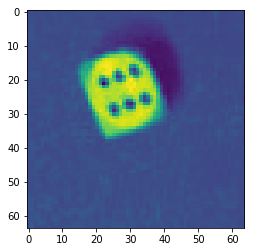

There are 6 dots, number is 98345


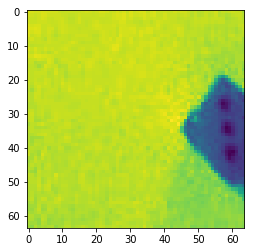

There are 3 dots, number is 46581


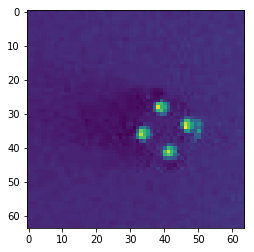

There are 4 dots, number is 24487


In [4]:
labels = np.ones((num_samples, ), dtype=int)
counter = 0
for folder in os.listdir(path):
    for i in range(1, 7):
        samples = len(os.listdir(path + folder + '/' + str(i)))
        labels[counter:counter+samples] = i-1
        counter += samples
            
rows, cols = 64, 64
labels_values = 6
train_data = [data, labels]
import random
for i in range(3):
    random_image = random.randint(0, 100800)
    img=data[random_image].reshape(rows, cols)
    plt.imshow(img)
    plt.show()
    print("There are {} dots, number is {}".format(labels[random_image] + 1, random_image))

In [7]:
(X, y) = (train_data[0], train_data[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

print('Images:\n', X_train.shape, '\n', X_test.shape)
print('Labels:\n', y_train.shape, '\n', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], rows, cols, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1).astype('float32')

# normalize to 0-1
X_train /= 255
X_test /= 255

print('Images:\n', X_train.shape, '\n', X_test.shape)

y_train = tf.one_hot(y_train, 6)
y_test = tf.one_hot(y_test, 6)
print('Labels:\n', y_train.shape, '\n', y_test.shape)


Images:
 (80640, 4096) 
 (20160, 4096)
Labels:
 (80640,) 
 (20160,)
Images:
 (80640, 64, 64, 1) 
 (20160, 64, 64, 1)
Labels:
 (80640, 6) 
 (20160, 6)


In [ ]:
def weight_variable(shape):
    init = tf.random_normal(shape, stddev=0.2)
    return tf.Variable(init)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='same')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='same')

In [ ]:
x = tf.placeholder(tf.float32, [None, 4096])
y = tf.placeholder(tf.float32, [None, 6])

x_image = tf.reshape(x, [-1, 64, 64, 1])

In [ ]:
W_conv1 = weight_variable([5, 5, 1, 32])

b_conv1 = weight_variable([32])

In [ ]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # [batch_size, 64, 64, 32]

h_pool1 = max_pooling(h_conv1) # [batch_size, 32, 32, 32]

In [ ]:
W_conv2 = weight_variable([5, 5, 32, 64])

b_conv2 = weight_variable([64])

In [ ]:
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # [batch_size, 32, 32, 64]

h_pool2 = max_pooling(h_conv2) #[batch_size, 16, 16, 64]

In [ ]:
keep_prob = tf.placeholder(tf.float32)

h_drop1 = tf.nn.dropout(h_pool2, keep_prob)

In [ ]:
W_fconn1 = weight_variable([16*16*64, 1024])

b_fconn1 = weight_variable([1024])

h_flat = tf.reshape(h_drop1, [-1, 16*16*64])

In [ ]:
h_fconn1 = tf.nn.relu(tf.matmul(h_flat, W_fconn1) + b_fconn1)

In [ ]:
h_drop_2 = tf.nn.dropout(h_fconn1, keep_prob)

In [ ]:
W_fconn2 = weight_variable([1024, 256])

b_fconn2 = weight_variable([256])

In [ ]:
h_fconn2 = tf.nn.relu(tf.matmul(h_drop_2, W_fconn2) + b_fconn2)

In [ ]:
h_drop_3 = tf.nn.dropout(h_fconnf, keep_prob)

In [ ]:
W_fconn3 = weight_variable([256, 64])

b_fconn3 = weight_variable([64])

In [ ]:
h_fconn3 = tf.nn.relu(tf.matmul(h_drop_3, W_fconn3) + b_fconn3)

In [ ]:
W_fconn4 = weight_variable([64, 6])

b_fconn4 = weight_variable([6])

In [ ]:
y_conv = tf.matmul(h_fconn3, W_fonn4) + b_fconn4 

In [ ]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv)

cross_entropy = tf.reduce_mean(cross_entropy)

In [ ]:
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))

accuracy = tf.reduce_mean(correct_prediction)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        X_batch = X_train.next_batch(256)
        y_batch = y_train.next_batch(256)
        
        train_step.run(feed_dict={
            x: X_batch, 
            y: y_batch, 
            keep_prob: 0.2})
        
        if i % 10 == 0:
            validation_accuracy = accuracy.eval(feed_dict={
                x: X_test, 
                y: y_test, 
                keep_prob: 1.0})
            print('Step {}, accuracy: {}'.format(i, round(validation_accuracy,3)))
            
    print('test accuracy: {}'.format(round(accuracy.eval(feed_dict={
        x: X_test, 
        y: y_test, 
        keep_prob: 1.0}),3)))